In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vjykp96c because the default path (/tf/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [31]:
# read in data
cas = '/tf/primo/data/stats/lo_random_pairings_cas9.h5'
hyb = '/tf/primo/data/stats/random_pairings_hybrid_10x10000.h5'

cas_df = pd.read_hdf(cas)
hyb_df = pd.read_hdf(hyb)

# make indices unique and convert old indices into column 'index'
# this is necessary for seaborn plotting
cas_df.reset_index(inplace=True)
hyb_df.reset_index(inplace=True)

# add edit distance column to dfs
def edit_distance(str1, str2):
    """
    Given two strings, returns an integer that is the number of 
    different bases between the two strings.
    """
    # get length of strings and make sure they match!
    if len(str1) != len(str2):
        raise ValueError("Sequences should be the same length!")
    
    # tally number of different bases
    edit_dist = 0
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            edit_dist += 1 
    return edit_dist
assert edit_distance("AGAAATGACGAAGTCTATAA", "AGAAATGACGAAGTCTATAG") == 1

cas_df['edit_dist'] = cas_df.apply(lambda x: edit_distance(x.target_features, x.query_features), axis=1)
hyb_df['edit_dist'] = hyb_df.apply(lambda x: edit_distance(x.target_features, x.query_features), axis=1)

In [19]:
# basic exploration
print('Cas activation min/max:', min(cas_df['activations']), "/", max(cas_df['activations']))
print('Hyb activation min/max:', min(hyb_df['activations']), "/", max(hyb_df['activations']))


Cas activation min/max: 0.00020000000000000004 / 1.0
Hyb activation min/max: 3.959737179403724e-09 / 1.0000000000011913


<AxesSubplot:title={'center':'Hybridization'}, xlabel='activations', ylabel='Count'>

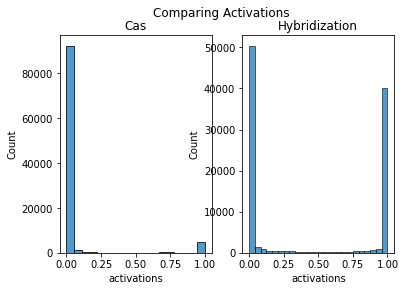

In [15]:
figure, axes = plt.subplots(1,2, sharex=False)

# titles
figure.suptitle('Comparing Activations')
axes[0].set_title('Cas')
axes[1].set_title('Hybridization')

sns.histplot(ax=axes[0], x=cas_df['activations'])
sns.histplot(ax=axes[1], x=hyb_df['activations'])


<AxesSubplot:title={'center':'Hybridization'}, xlabel='hdists', ylabel='Count'>

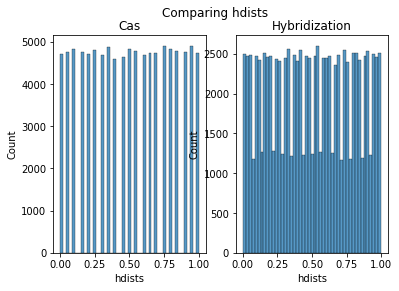

In [41]:
figure, axes = plt.subplots(1,2, sharex=True)

# titles
figure.suptitle('Comparing hdists')
axes[0].set_title('Cas')
axes[1].set_title('Hybridization')

sns.histplot(ax=axes[0], x=cas_df['hdists'])
sns.histplot(ax=axes[1], x=hyb_df['hdists'])


<AxesSubplot:title={'center':'Hybridization'}, xlabel='edit_dist', ylabel='Count'>

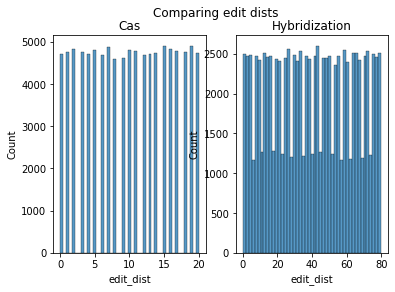

In [43]:
figure, axes = plt.subplots(1,2, sharex=False)

# titles
figure.suptitle('Comparing edit dists')
axes[0].set_title('Cas')
axes[1].set_title('Hybridization')

sns.histplot(ax=axes[0], x=cas_df['edit_dist'])
sns.histplot(ax=axes[1], x=hyb_df['edit_dist'])


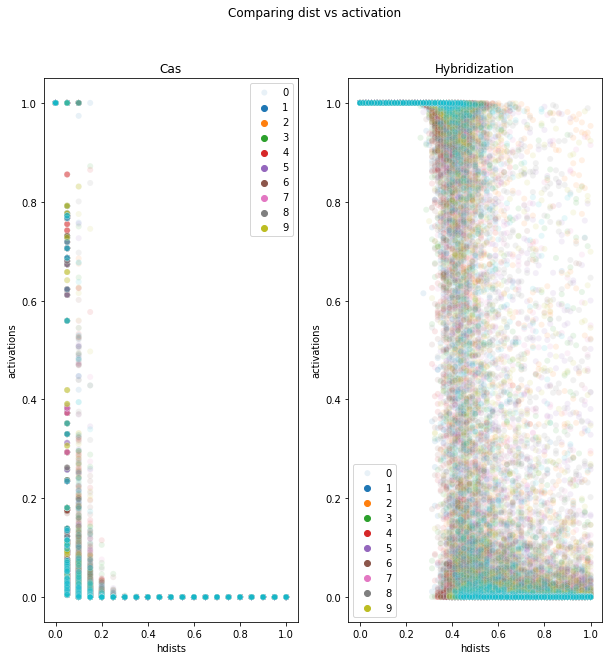

In [124]:
labels = [str(i) for i in range(10)]
figure, axes = plt.subplots(1,2, sharex=False, figsize=(10,10))

# titles
figure.suptitle('Comparing dist vs activation')
axes[0].set_title('Cas')
axes[1].set_title('Hybridization')

# data
sns.scatterplot(ax=axes[0], x=cas_df['hdists'], y=cas_df['activations'], hue=cas_df['target_features'], alpha=.1)
sns.scatterplot(ax=axes[1], x=hyb_df['hdists'], y=hyb_df['activations'], hue=hyb_df['target_features'], alpha=.1)

# legend fiddling
axes[0].legend(labels=labels)
axes[1].legend(labels=labels)


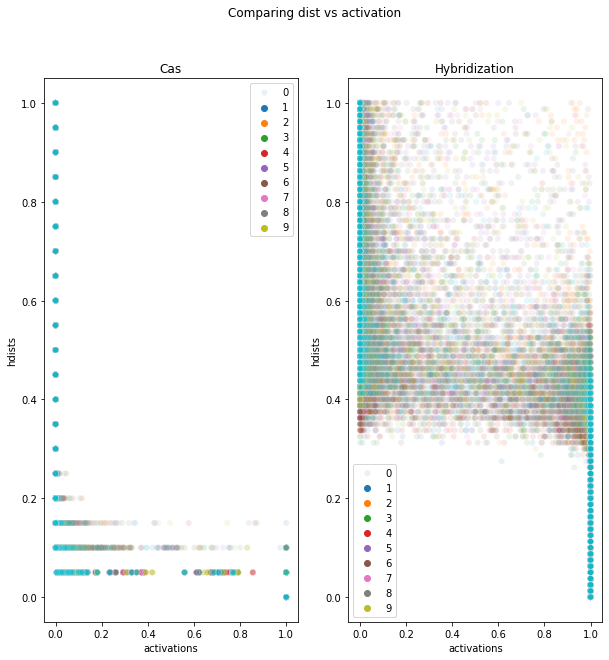

In [125]:
labels = [str(i) for i in range(10)]
figure, axes = plt.subplots(1,2, sharex=False, figsize=(10,10))

# titles
figure.suptitle('Comparing dist vs activation')
axes[0].set_title('Cas')
axes[1].set_title('Hybridization')

# data
sns.scatterplot(ax=axes[0], y=cas_df['hdists'], x=cas_df['activations'], hue=cas_df['target_features'], alpha=.1)
sns.scatterplot(ax=axes[1], y=hyb_df['hdists'], x=hyb_df['activations'], hue=hyb_df['target_features'], alpha=.1)

# legend fiddling
axes[0].legend(labels=labels)
axes[1].legend(labels=labels)


In [67]:
print(cas_df.shape == hyb_df.shape)
print(cas_df.shape)

True
(100000, 6)


In [75]:
print(len(cas_df['activations'].unique()))
print(len(hyb_df['activations'].unique()))

7608
75179


In [87]:
# examine the anchors
cas_anchors = (cas_df['target_features'].unique())
hyb_anchors = (hyb_df['target_features'].unique())

data = []
for ca1 in cas_anchors:
    ca1vs2 = []
    for ca2 in cas_anchors:
        ca1vs2.append(edit_distance(ca1, ca2))
    data.append(ca1vs2)
anchor_labels = [str('Anchor' + str(i)) for i in range(len(cas_anchors))]
cas_anchor_df = pd.DataFrame(data, columns = anchor_labels)

data = []
for ca1 in hyb_anchors:
    ca1vs2 = []
    for ca2 in hyb_anchors:
        ca1vs2.append(edit_distance(ca1, ca2))
    data.append(ca1vs2)
anchor_labels = [str('Anchor' + str(i)) for i in range(len(cas_anchors))]
hyb_anchor_df = pd.DataFrame(data, columns = anchor_labels)


[Text(0.5, 1.0, 'Hybridization')]

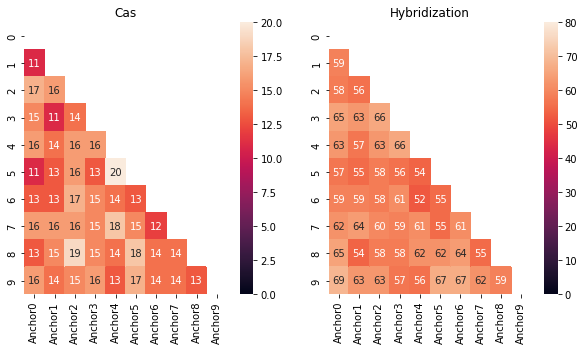

In [123]:
plt.figure(figsize=(10,5))
plt.title('Comparing Edit Distances')

# cas
plt.subplot(1,2,1)
mask = np.zeros_like(cas_anchor_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cas_anchor_df, mask=mask, annot=True, vmin=0, vmax=20).set(title="Cas")

# hyb
plt.subplot(1,2,2)
mask = np.zeros_like(hyb_anchor_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hyb_anchor_df, mask=mask, annot=True, vmin=0, vmax=80).set(title="Hybridization")
